In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# Reading File For Home Audio
home_audio = pd.read_csv('HomeAudio.csv')
home_audio.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [3]:
home_audio = home_audio.drop(['Unnamed: 0'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [4]:
home_audio.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv',
       'units', 'deliverybdays', 'deliverycdays', 's1_fact_order_payment_type',
       'sla', 'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'week', 'Pay_Day', 'is_holiday', 'special_sale',
       'Discount_Percentage', 'gmvperunit', 'delivery_on_time',
       'delivery_status', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'SEM', 'Radio', 'Other',
       ' Affiliates', 'week_y', 'NPS', 'NPSScore', 'holiday_count', 'ItemType',
       'month_date', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'inc_LP_MA1', 'inc_LP_MA2', 'inc_LP_MA3', 'inc_PO_MA1', 'inc_PO_MA2',
       'inc_PO_MA3', 'LP_lag_1_per', 

In [5]:
# Drop lag, MA and GMV columns
home_audio = home_audio.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3',
                              'LP_lag_3_per','PO_lag_1_per-3','GMV_lag_3_per'], axis=1)

home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,LP_lag_1_per,LP_lag_2_per,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,"15,747,089.60","72,093,251.50",0.00,0.00,0.28,0.13,-0.78,-0.64,0.28,0.13
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.12,-0.10,0.62,0.44,-0.12,-0.10
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,"27,557,406.80","126,163,190.13",0.00,0.00,0.03,-0.09,-0.11,0.92,0.03,-0.09
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.11,-0.11,1.16,1.16,-0.11,-0.11
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,"30,509,986.10","139,680,674.78",0.00,0.00,0.00,0.12,0.00,-0.54,0.00,0.12


In [6]:
home_audio['LP_lag_1_per'] = home_audio['LP_lag_1_per'].fillna(0)
home_audio['LP_lag_2_per'] = home_audio['LP_lag_2_per'].fillna(0)

home_audio['PO_lag_1_per-1'] = home_audio['PO_lag_1_per-1'].fillna(0)
home_audio['PO_lag_1_per-2'] = home_audio['PO_lag_1_per-2'].fillna(0)

home_audio['GMV_lag_1_per'] = home_audio['GMV_lag_1_per'].fillna(0)
home_audio['GMV_lag_2_per'] = home_audio['GMV_lag_2_per'].fillna(0)

In [7]:
home_audio['PO_lag_1_per-1'] = home_audio['PO_lag_1_per-1'].replace([np.inf, -np.inf], 0)

In [8]:
home_audio['PO_lag_1_per-2'] = home_audio['PO_lag_1_per-2'].replace([np.inf, -np.inf], 0)

In [9]:
home_audio = home_audio.drop(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'week', 'week_y', 'month_date'], 
                            axis=1)
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,LP_lag_1_per,LP_lag_2_per,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"7,049.00",1,0,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"15,747,089.60","72,093,251.50",0.00,0.00,0.28,0.13,-0.78,-0.64,0.28,0.13
1,"5,489.00",1,0,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.12,-0.10,0.62,0.44,-0.12,-0.10
2,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"27,557,406.80","126,163,190.13",0.00,0.00,0.03,-0.09,-0.11,0.92,0.03,-0.09
3,"6,099.00",1,0,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.11,-0.11,1.16,1.16,-0.11,-0.11
4,"6,850.00",1,0,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"30,509,986.10","139,680,674.78",0.00,0.00,0.00,0.12,0.00,-0.54,0.00,0.12


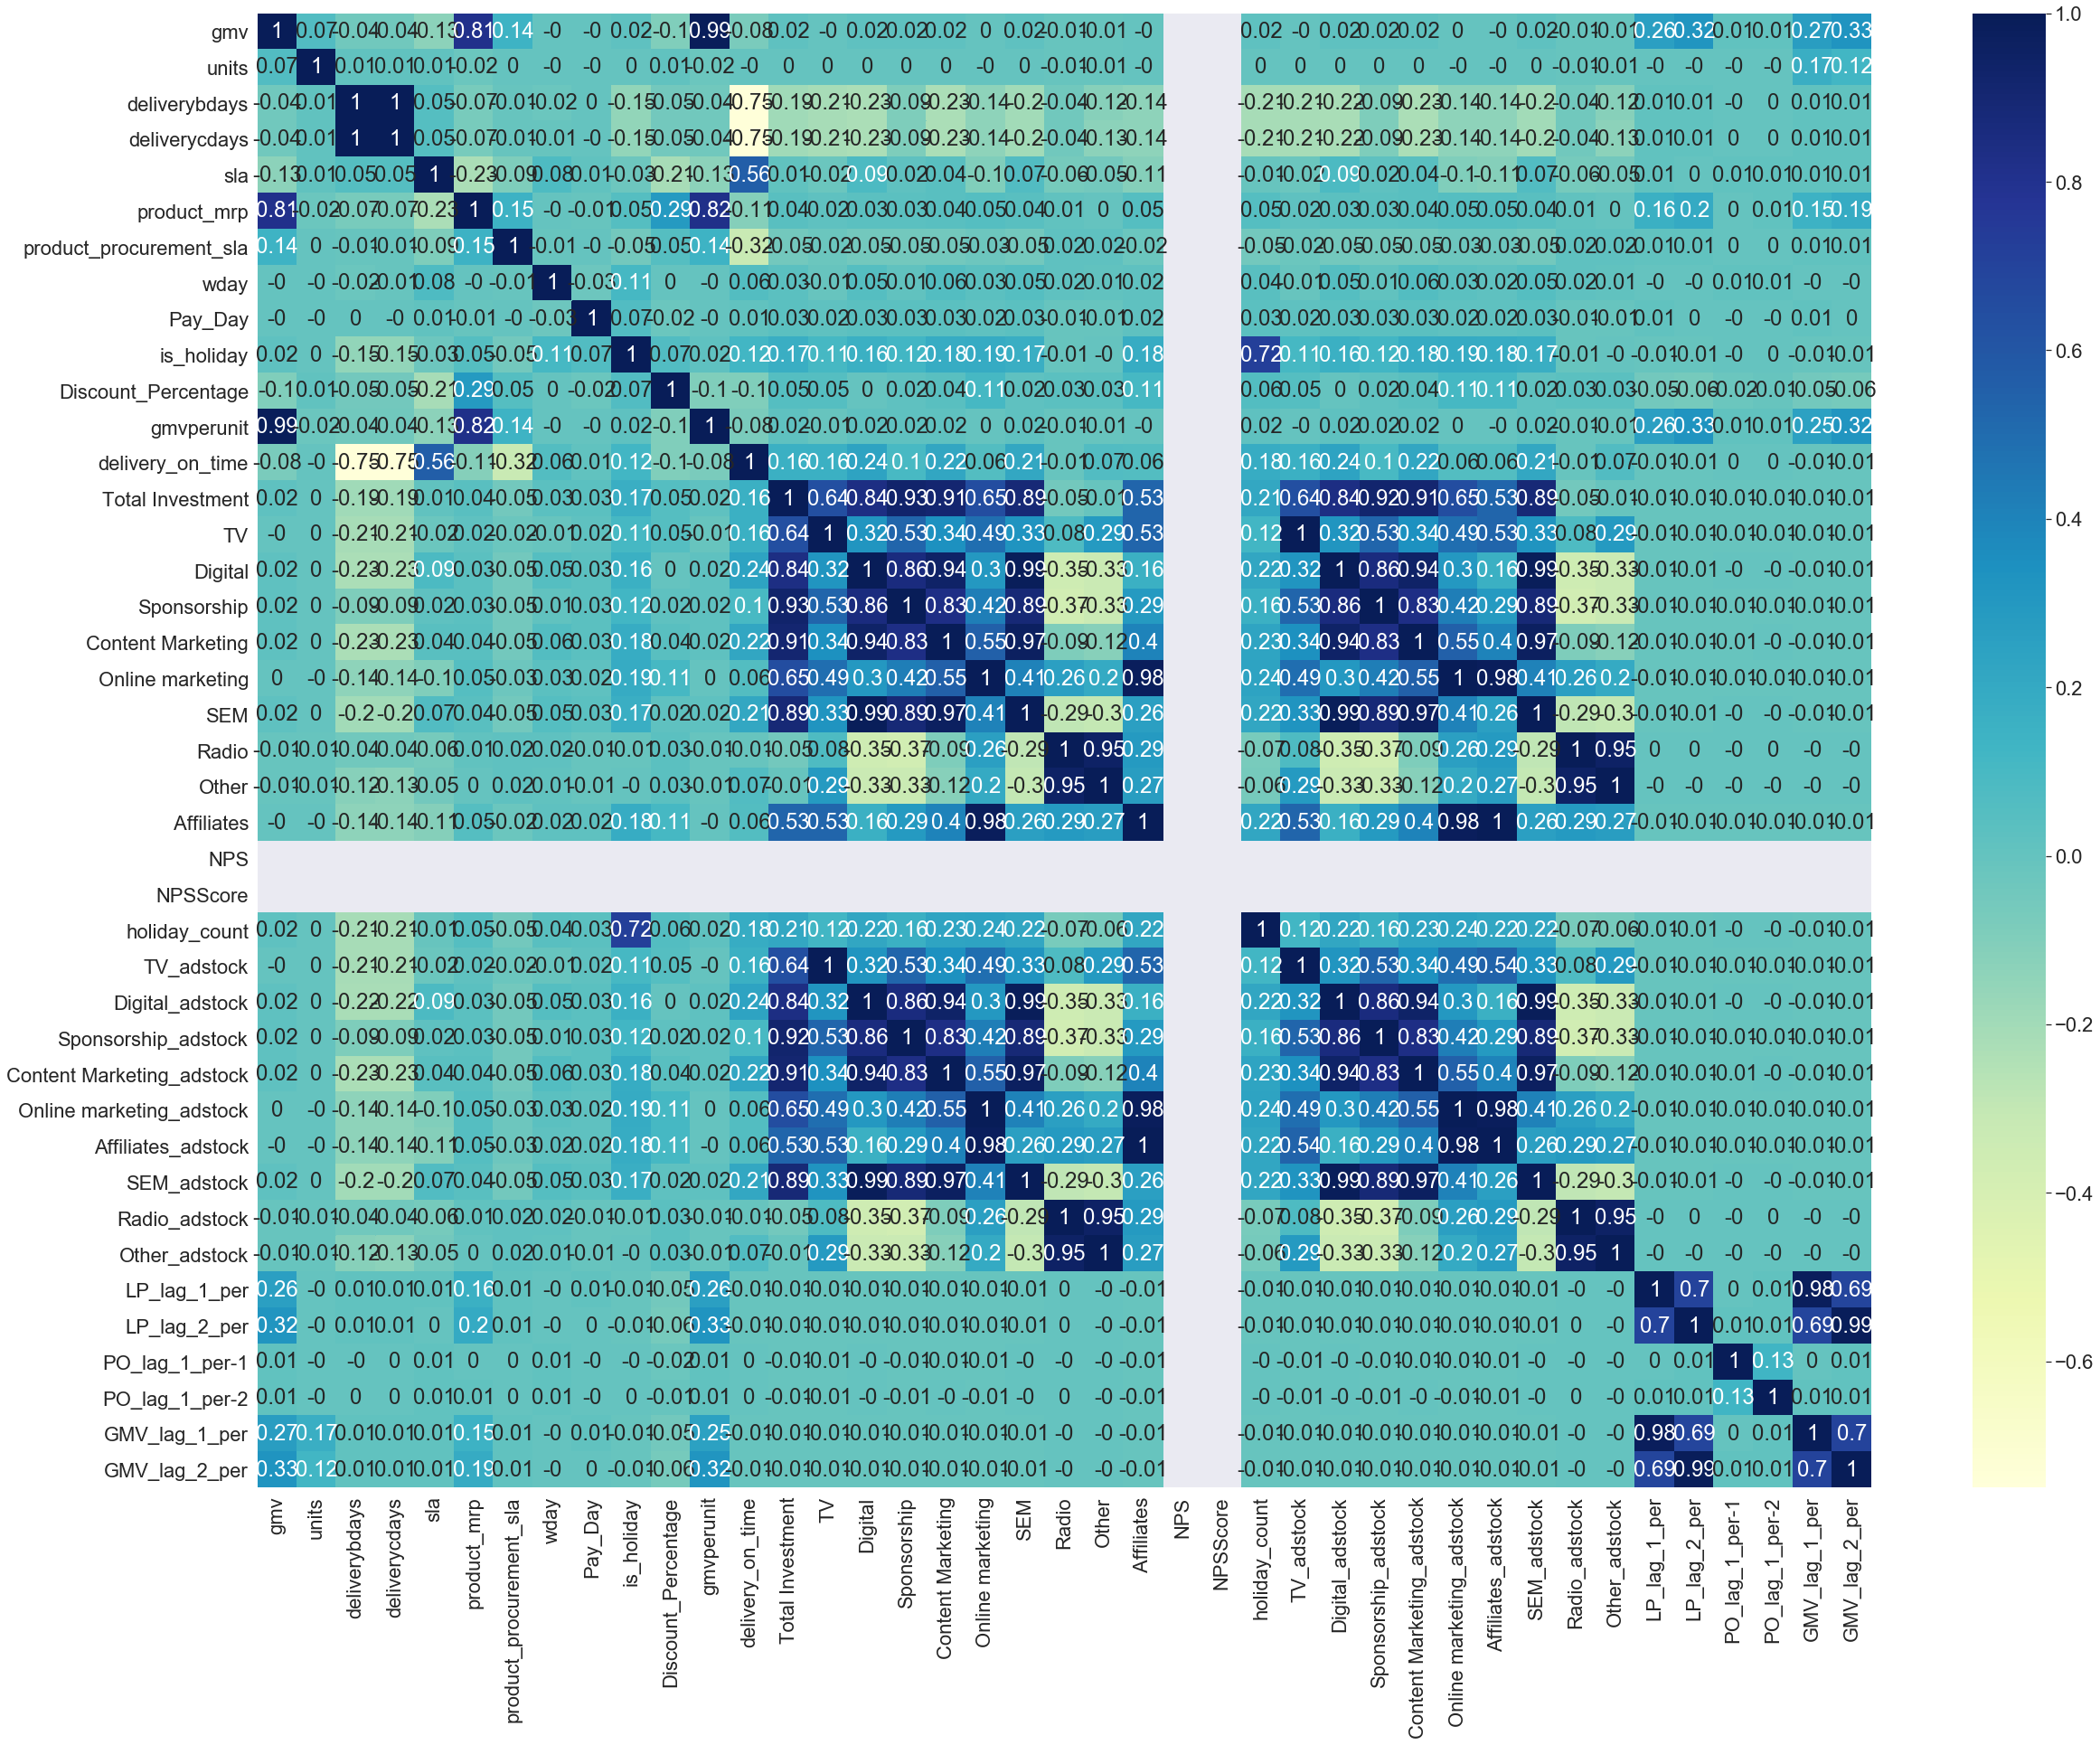

In [10]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(home_audio.corr(), 2), annot=True, cmap="YlGnBu")

In [11]:
home_audio = home_audio.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock', 
                              'LP_lag_1_per', 'LP_lag_2_per'], axis=1)

home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"7,049.00",1,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,0.00,"15,747,089.60",nan,nan,0.00,Luxury,-0.78,-0.64,0.28,0.13
1,"5,489.00",1,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,0.00,"15,747,089.60",nan,nan,4.00,Luxury,0.62,0.44,-0.12,-0.10
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,0.00,"15,747,089.60",nan,nan,4.00,Luxury,-0.11,0.92,0.03,-0.09
3,"6,099.00",1,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,0.00,"15,747,089.60",nan,nan,4.00,Luxury,1.16,1.16,-0.11,-0.11
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,0.00,"15,747,089.60",nan,nan,0.00,Luxury,0.00,-0.54,0.00,0.12


In [12]:
home_audio.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'Pay_Day', 'is_holiday', 'special_sale', 'Discount_Percentage',
       'delivery_on_time', 'delivery_status', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Radio', 'Other', ' Affiliates', 'NPS', 'NPSScore',
       'holiday_count', 'ItemType', 'PO_lag_1_per-1', 'PO_lag_1_per-2',
       'GMV_lag_1_per', 'GMV_lag_2_per'],
      dtype='object')

In [13]:
home_audio.isnull().sum()

gmv                                  0
units                                0
deliverycdays                        0
s1_fact_order_payment_type           0
sla                                  0
product_analytic_category            0
product_analytic_sub_category        0
product_analytic_vertical            0
product_mrp                          0
product_procurement_sla              0
wday                                 0
Pay_Day                              0
is_holiday                           0
special_sale                         0
Discount_Percentage                  0
delivery_on_time                     0
delivery_status                      0
Total Investment                     0
TV                                   0
Digital                              0
Sponsorship                          0
Content Marketing                    0
Online marketing                     0
SEM                                  0
Radio                                0
Other                    

In [14]:
home_audio['NPS'] = home_audio['NPS'].fillna(0)
home_audio['NPSScore'] = home_audio['NPSScore'].fillna(0)

In [15]:
home_audio.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
 Affiliates                      0
NPS                              0
NPSScore            

In [16]:
home_audio.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [17]:
home_audio.shape

(97387, 35)

In [18]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
home_audio.describe()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
count,"97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00",...,"97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00"
mean,"2,193.18",1.01,0.84,5.66,"3,934.31",2.65,3.00,0.06,0.21,39.15,...,"1,089,306.58","11,597,821.02","13,594,024.21",0.00,0.00,1.20,0.24,0.34,0.05,0.07
std,"2,031.54",0.17,2.16,2.92,"3,630.33",1.41,1.94,0.24,0.41,20.66,...,"1,991,353.71","20,998,477.06","4,377,084.46",0.00,0.00,1.67,8.15,10.52,0.87,1.13
min,129.00,1.00,0.00,0.00,189.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,"166,383.18",0.00,0.00,0.00,-1.00,-1.00,-0.99,-0.99
25%,"1,070.00",1.00,0.00,4.00,"1,735.00",1.00,1.00,0.00,0.00,20.59,...,0.00,0.00,"14,039,892.47",0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"1,999.00",1.00,0.00,5.00,"3,499.00",2.00,3.00,0.00,0.00,43.31,...,0.00,0.00,"15,415,666.31",0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"2,690.00",1.00,0.00,7.00,"5,399.00",4.00,5.00,0.00,0.00,57.18,...,"1,964,516.13","11,260,967.74","15,747,089.60",0.00,0.00,3.00,0.00,0.00,0.00,0.00
max,"75,000.00",19.00,28.00,41.00,"98,000.00",14.00,6.00,1.00,1.00,95.50,...,"6,096,774.19","61,170,967.74","16,641,935.48",0.00,0.00,6.00,"1,246.29","1,857.59",114.41,116.64


In [19]:
home_audio['delivery_on_time'].unique()

array([  0.,  -3.,   4.,  -2.,  -1.,   1.,   5.,   2.,   3.,   6.,   9.,
        11.,  10.,   8.,   7.,  13.,  -4.,  12., -11.,  15.,  14.,  -5.,
       -13.,  40., -31.,  17.,  18.,  16.,  -8.,  22.,  -9.,  21.,  23.,
        -7., -21.,  -6., -12., -10., -20., -15., -19.,  20., -18., -29.,
       -14., -17., -16., -23.,  24., -22., -38., -28., -37., -45., -30.,
       -32., -26., -24., -34.,  19., -27., -41., -46., -25.])

In [20]:
#Delivery time can't be negative hence taking positive values
home_audio=home_audio.loc[(home_audio['delivery_on_time']>0)]
home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,0.00,"15,747,089.60",0.00,0.00,4.00,Luxury,-0.11,0.92,0.03,-0.09
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,0.00,-0.54,0.00,0.12
8,"6,850.00",1,0,Prepaid,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,0.05,-0.68,-0.00,0.25
11,"6,700.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,0.00,"15,747,089.60",0.00,0.00,4.00,Luxury,0.33,-0.25,-0.03,0.04
12,"6,900.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,-0.44,-0.57,0.07,0.13


In [21]:
home_audio.shape

(62116, 35)

In [22]:
# Subset all categorical variables
home_audio_categorical = home_audio.select_dtypes(include=['object'])
home_audio_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
2,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
4,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
8,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
11,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
12,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury


In [23]:
#Subset all numerical variables
home_audio_numerical = home_audio.select_dtypes(include=['int64','float64'])
home_audio_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,0.00,0.00,"15,747,089.60",0.00,0.00,4.00,-0.11,0.92,0.03,-0.09
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.00,-0.54,0.00,0.12
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.05,-0.68,-0.00,0.25
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,0.00,0.00,"15,747,089.60",0.00,0.00,4.00,0.33,-0.25,-0.03,0.04
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,-0.44,-0.57,0.07,0.13


In [24]:
# Convert into dummies
dummies = pd.get_dummies(home_audio_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
# Drop categorical variable columns
home_audio = home_audio.drop(list(home_audio_categorical.columns), axis=1)

In [27]:
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,0.00,0.00,"15,747,089.60",0.00,0.00,4.00,-0.11,0.92,0.03,-0.09
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.00,-0.54,0.00,0.12
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.05,-0.68,-0.00,0.25
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,0.00,0.00,"15,747,089.60",0.00,0.00,4.00,0.33,-0.25,-0.03,0.04
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,-0.44,-0.57,0.07,0.13


In [28]:
# Concatenate dummy variables with X
ha = pd.concat([home_audio, dummies], axis=1)
ha.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,0,1,0,0,0,0,0,0,0,0
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,0,1,0,0,0,0,0,0,0,0
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,0,0,0,0,0,0,1,0,0,0


In [29]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gmv                                         62116 non-null  float64
 1   units                                       62116 non-null  int64  
 2   deliverycdays                               62116 non-null  int64  
 3   sla                                         62116 non-null  int64  
 4   product_mrp                                 62116 non-null  float64
 5   product_procurement_sla                     62116 non-null  int64  
 6   wday                                        62116 non-null  int64  
 7   Pay_Day                                     62116 non-null  int64  
 8   is_holiday                                  62116 non-null  int64  
 9   Discount_Percentage                         62116 non-null  float64
 10  delivery_o

In [30]:
# missing information
ha.isnull().any()

gmv                                           False
units                                         False
deliverycdays                                 False
sla                                           False
product_mrp                                   False
product_procurement_sla                       False
wday                                          False
Pay_Day                                       False
is_holiday                                    False
Discount_Percentage                           False
delivery_on_time                              False
Total Investment                              False
TV                                            False
Digital                                       False
Sponsorship                                   False
Content Marketing                             False
Online marketing                              False
SEM                                           False
Radio                                         False
Other       

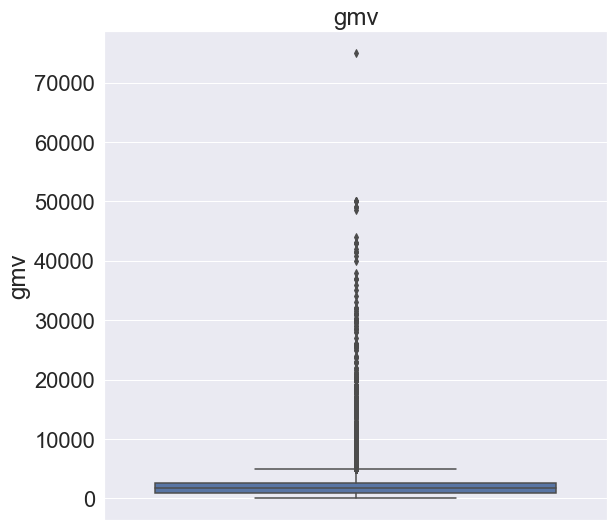

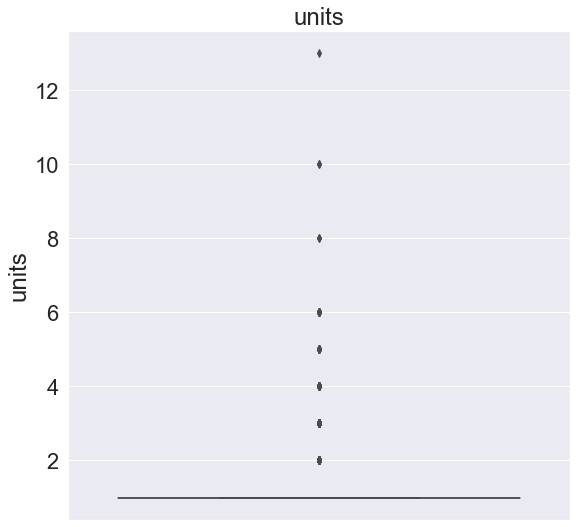

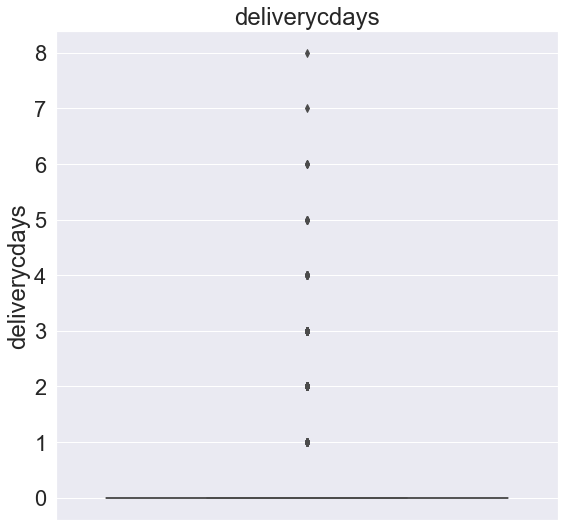

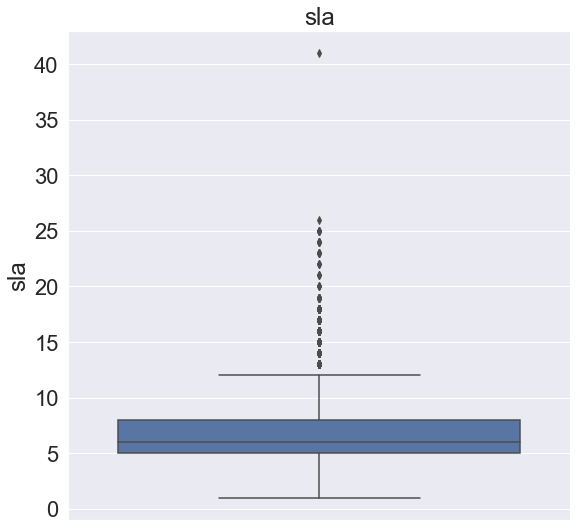

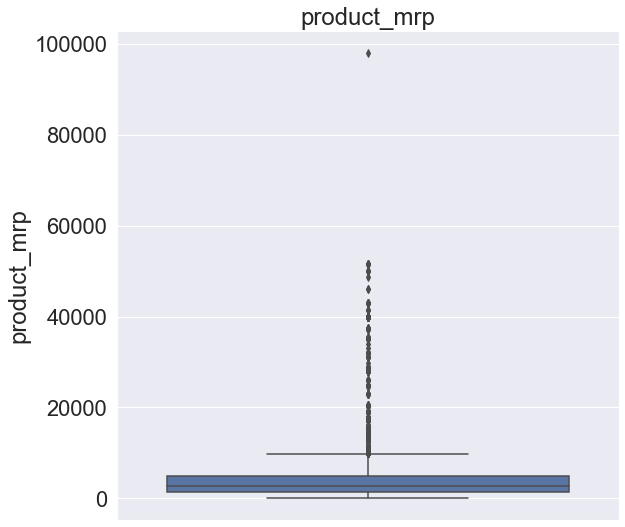

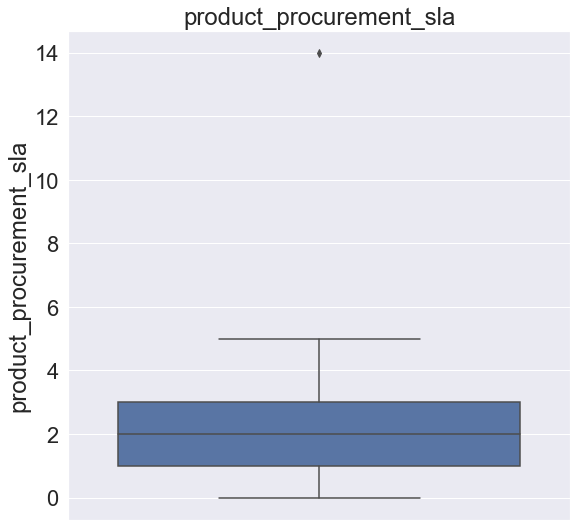

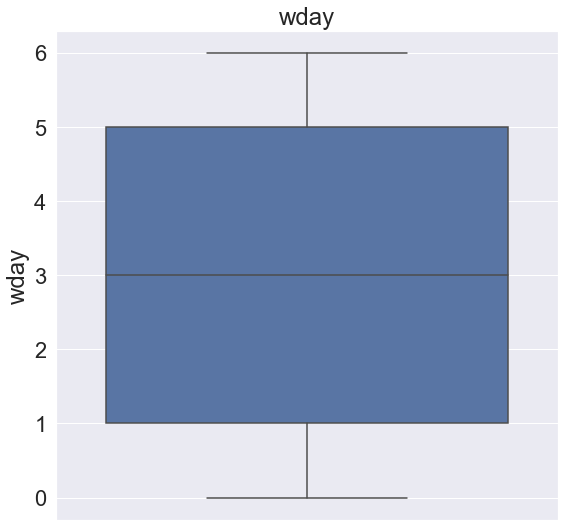

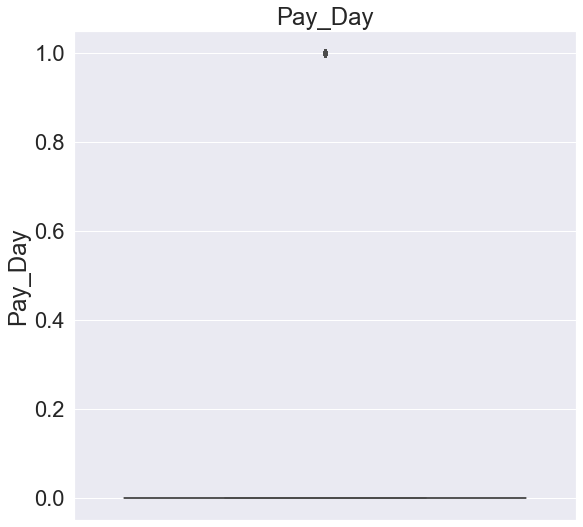

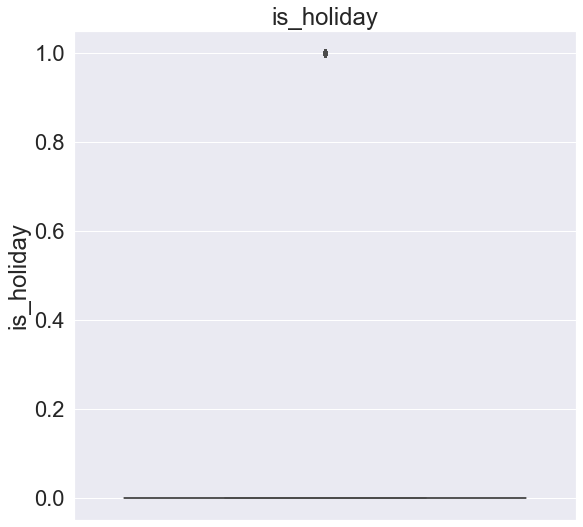

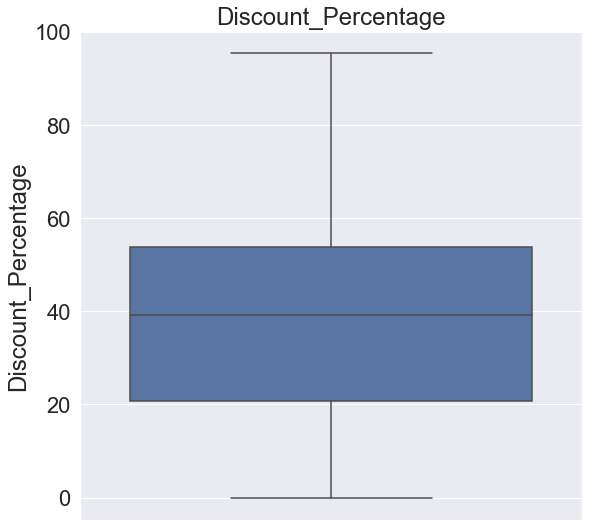

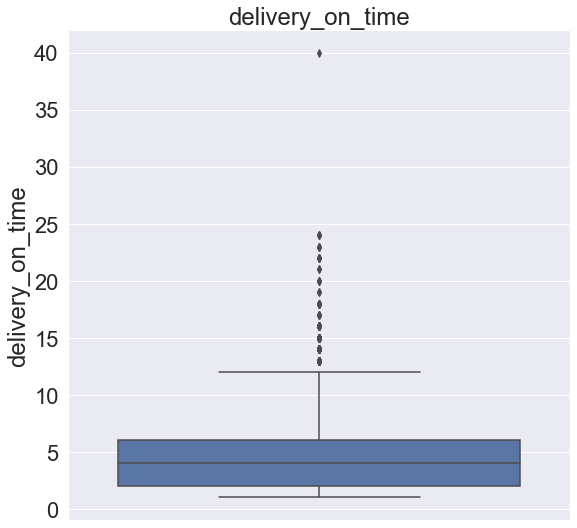

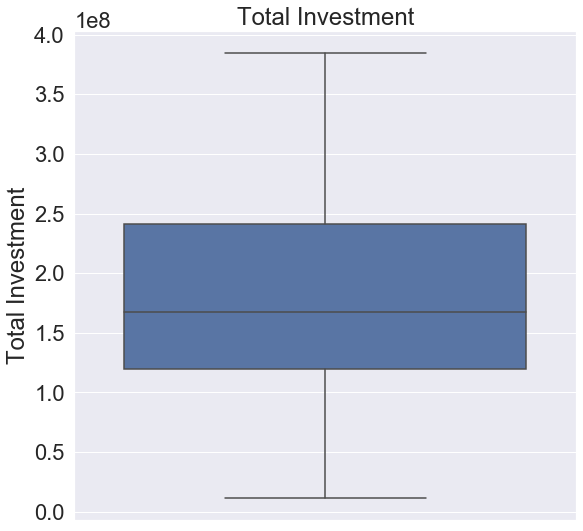

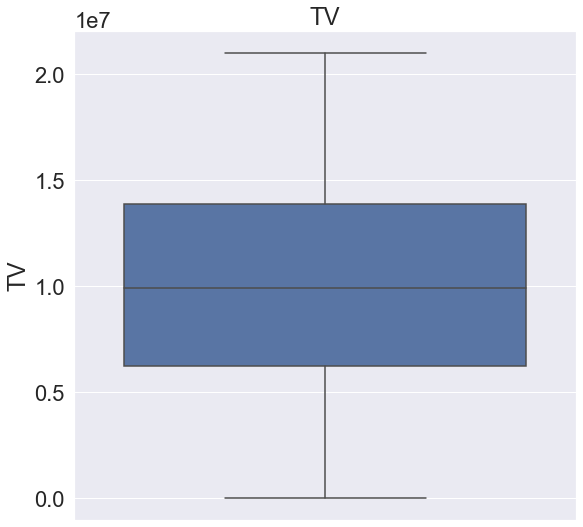

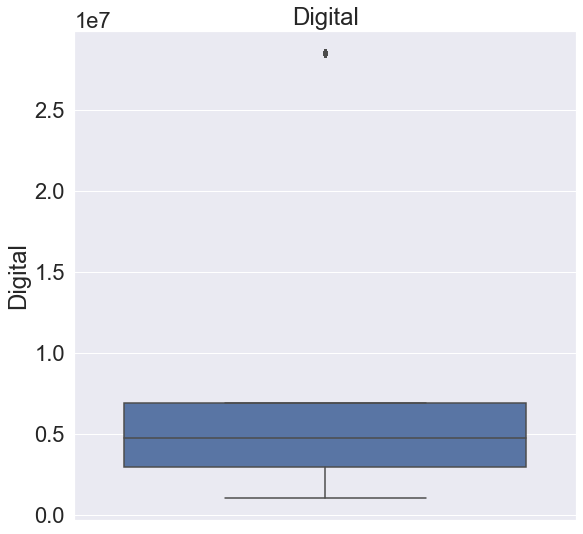

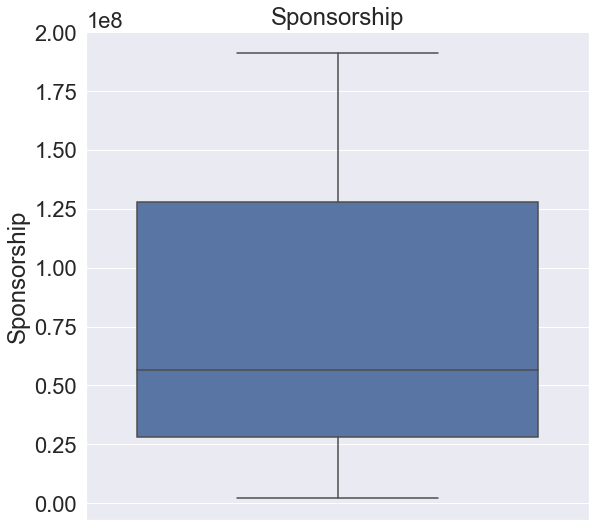

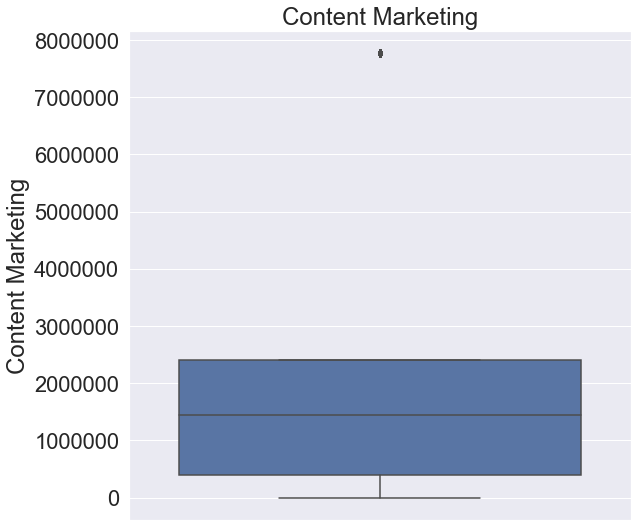

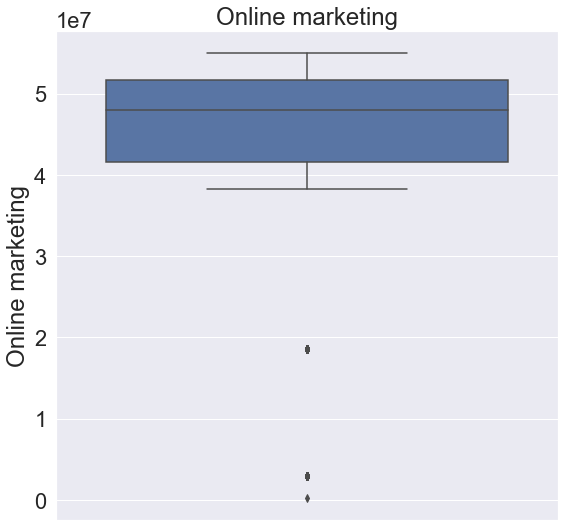

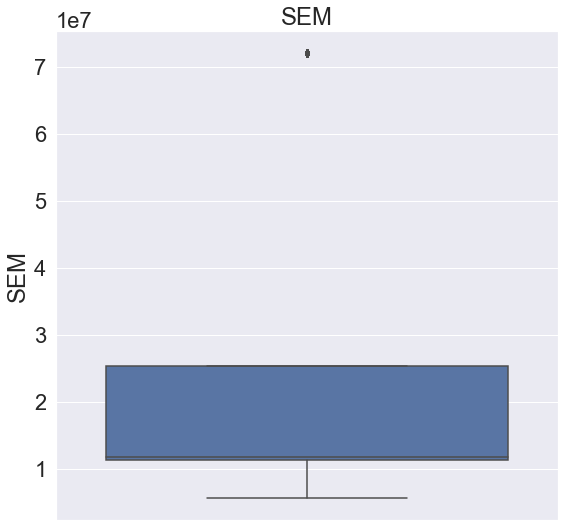

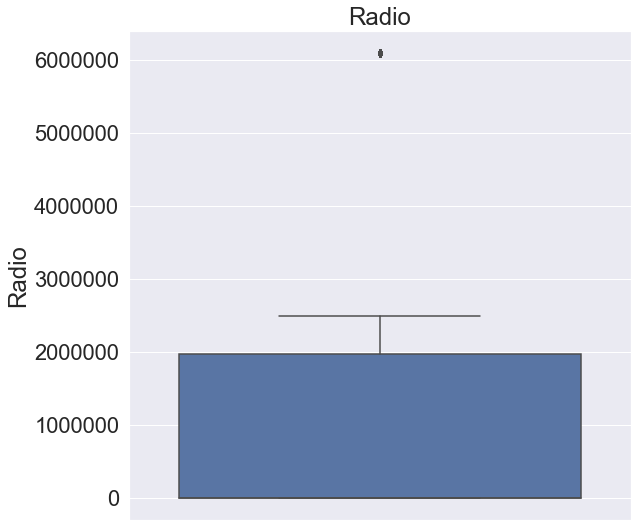

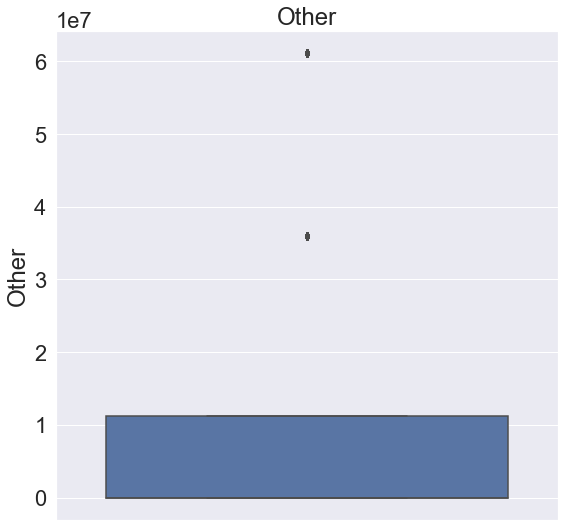

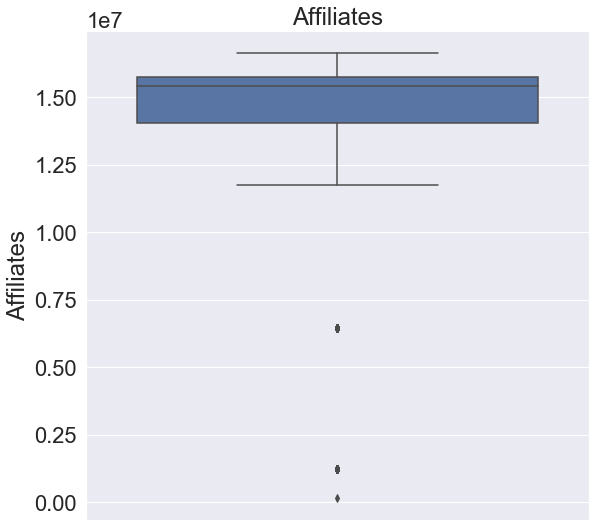

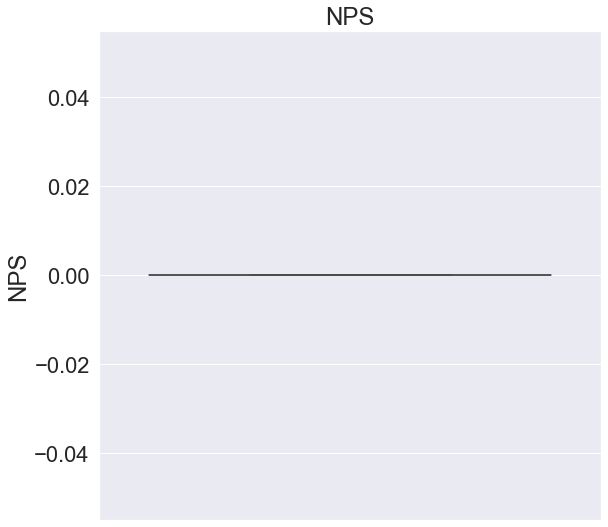

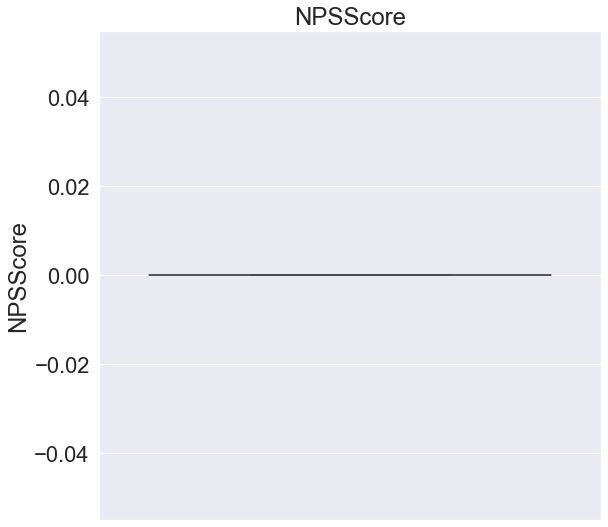

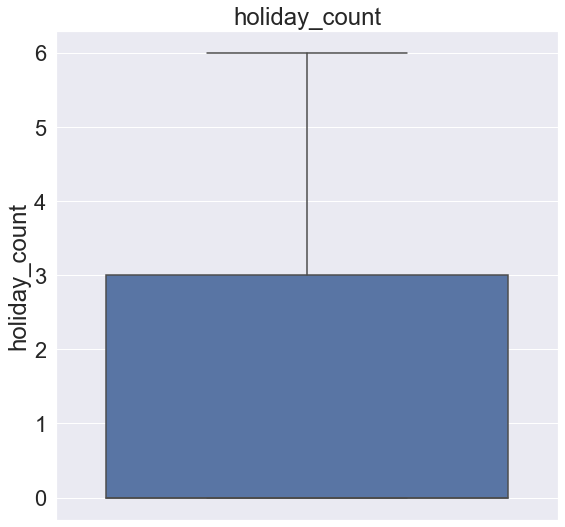

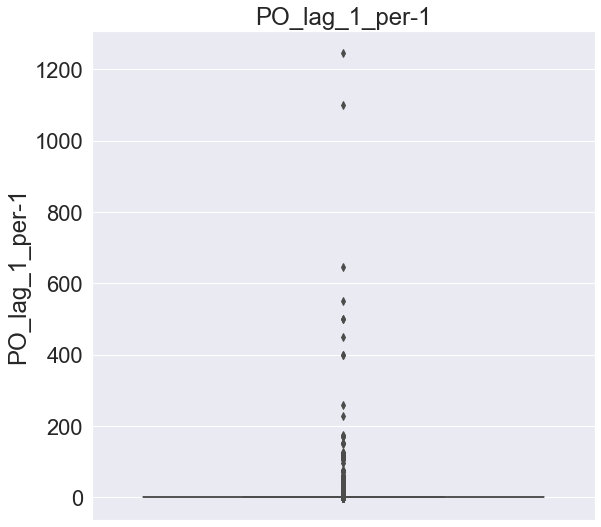

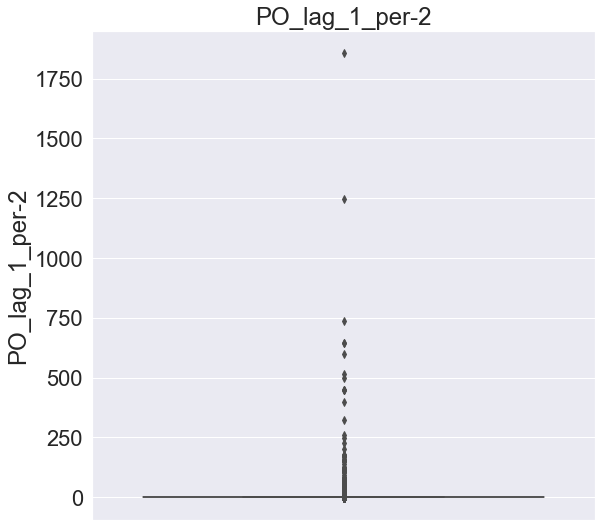

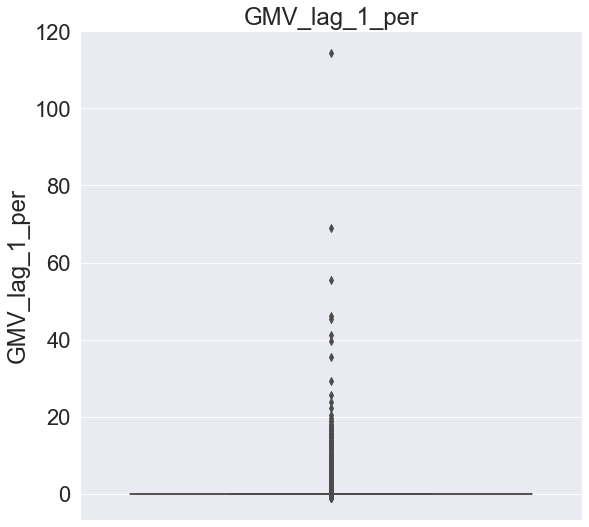

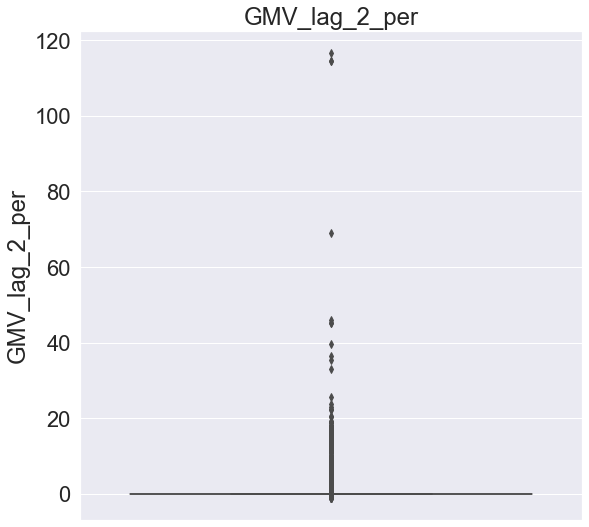

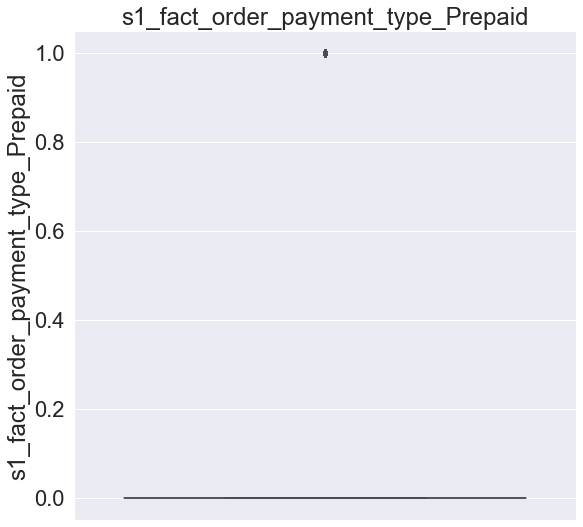

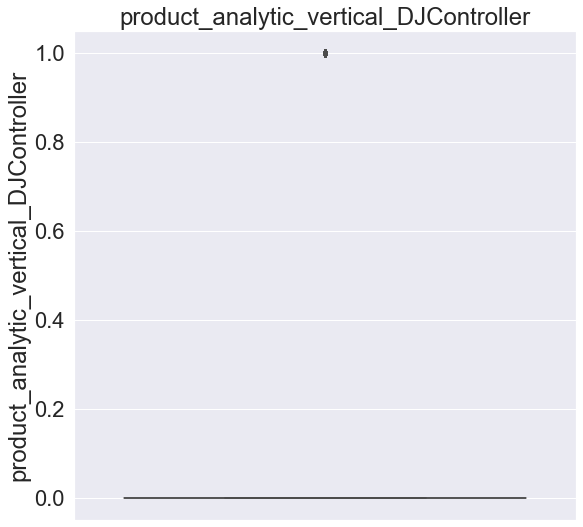

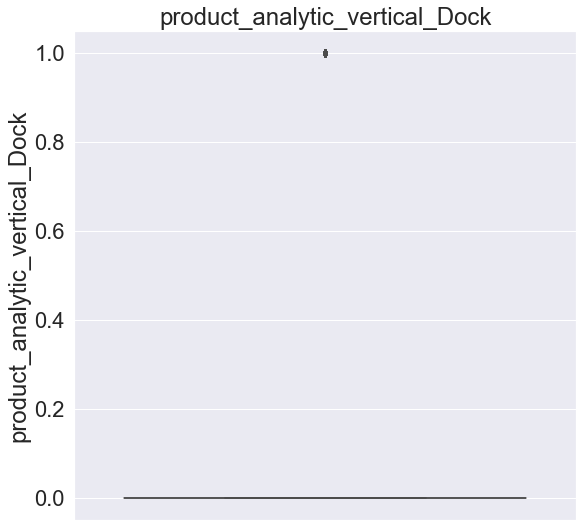

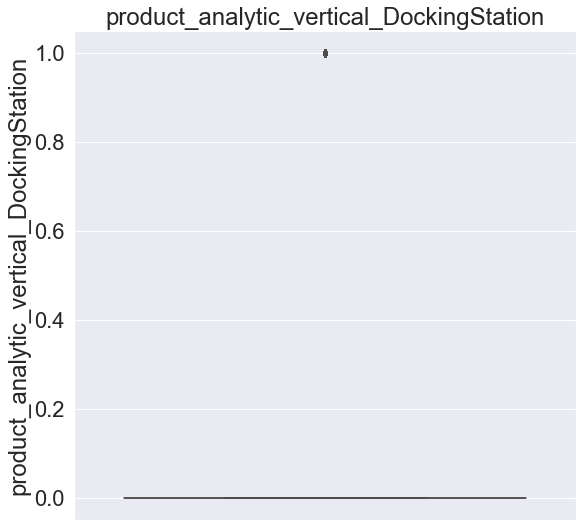

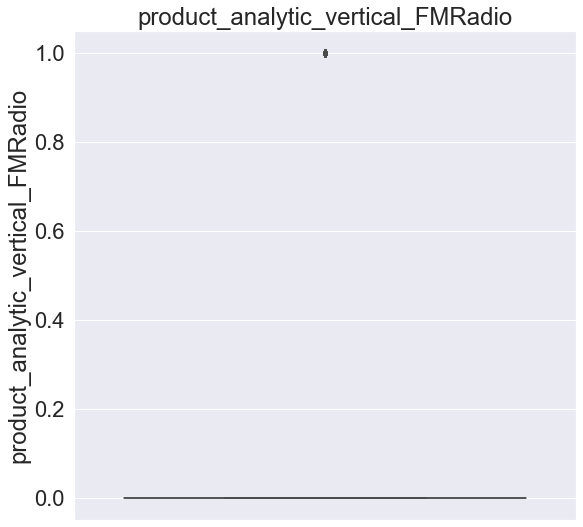

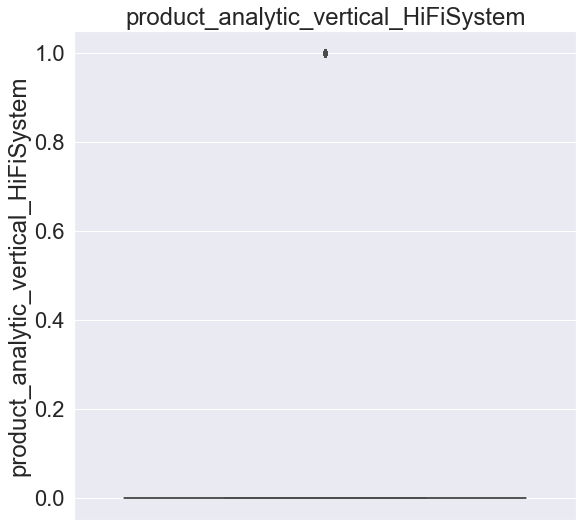

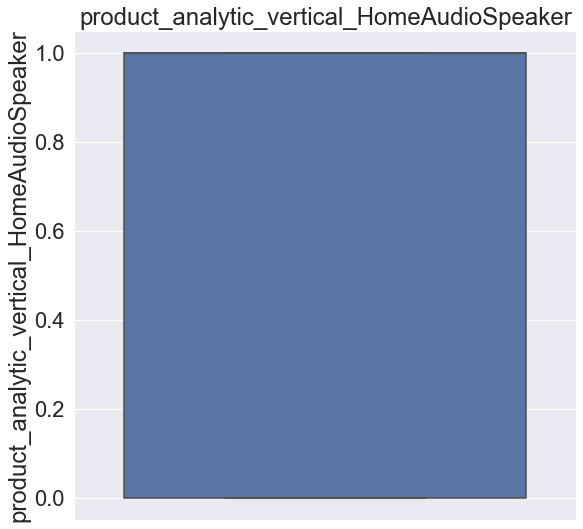

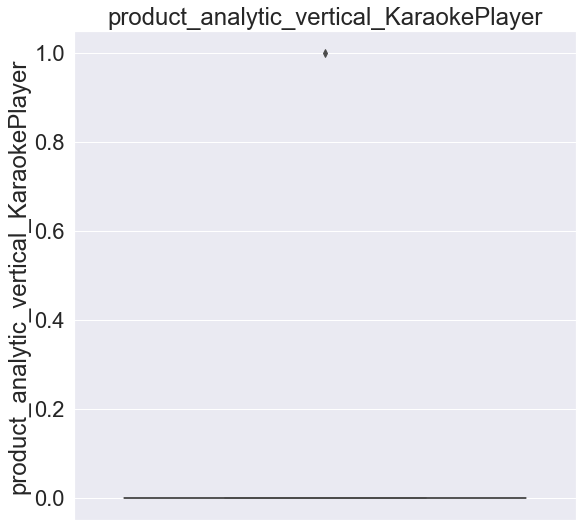

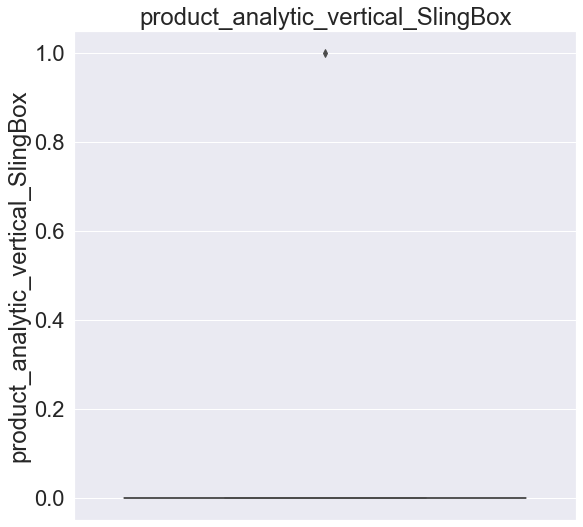

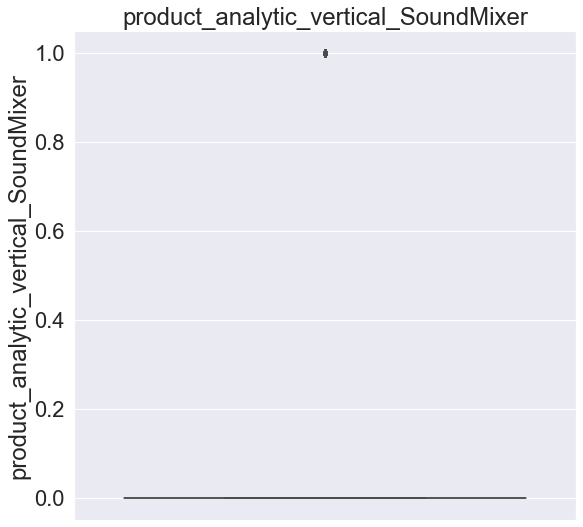

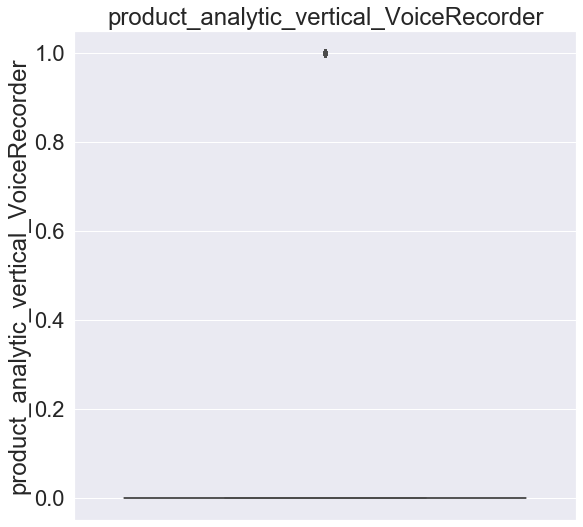

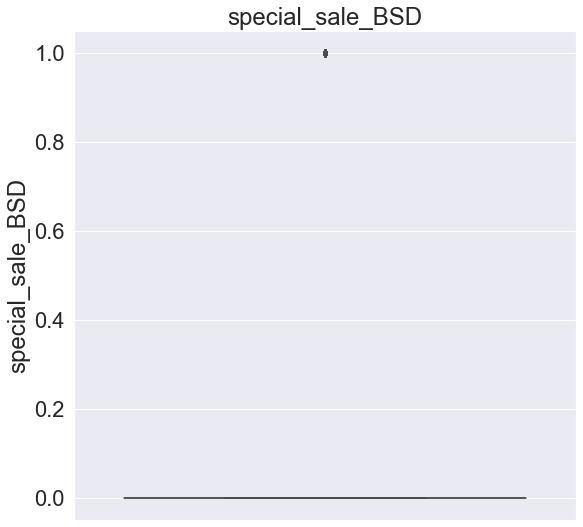

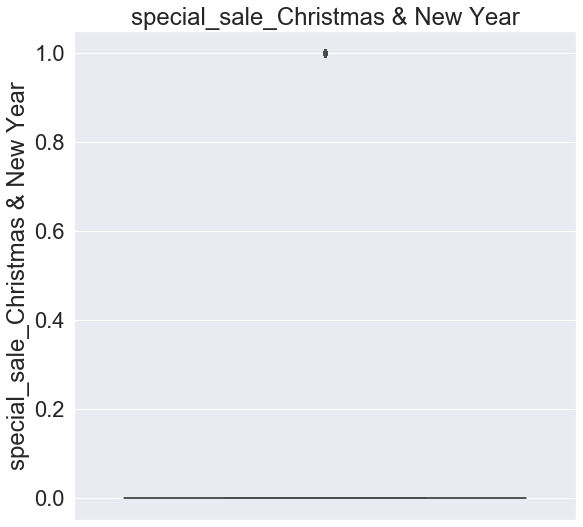

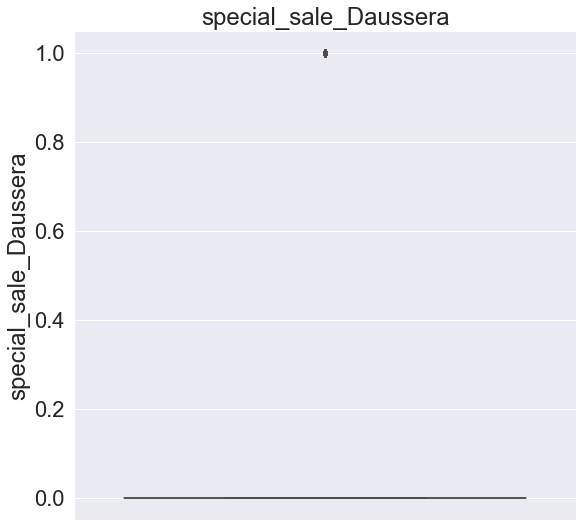

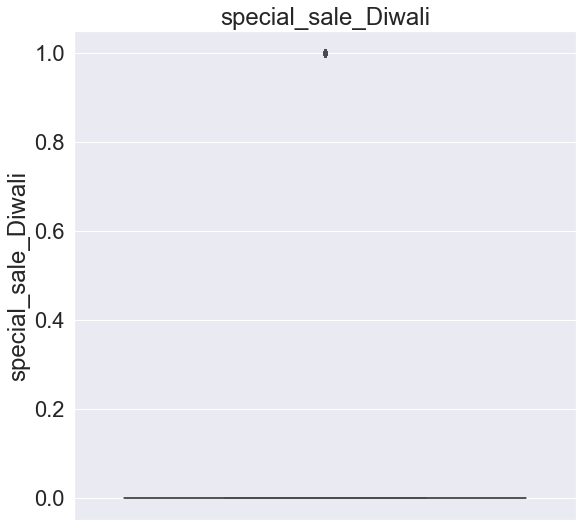

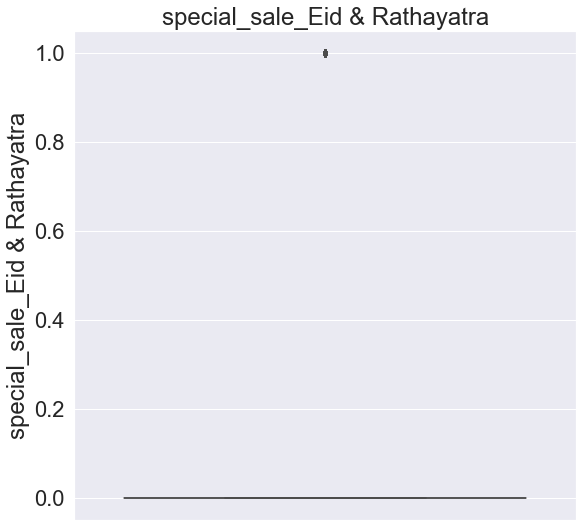

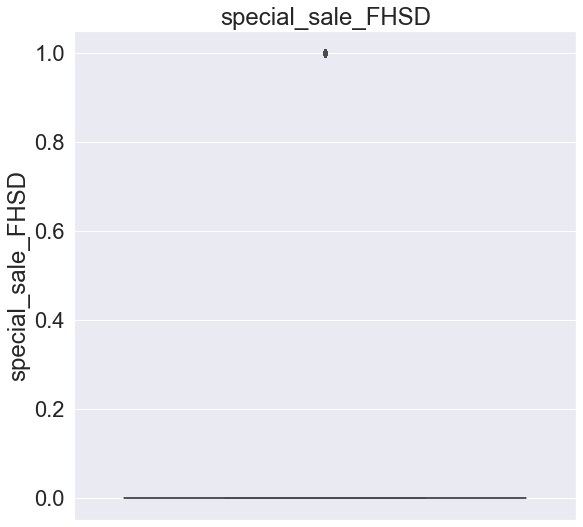

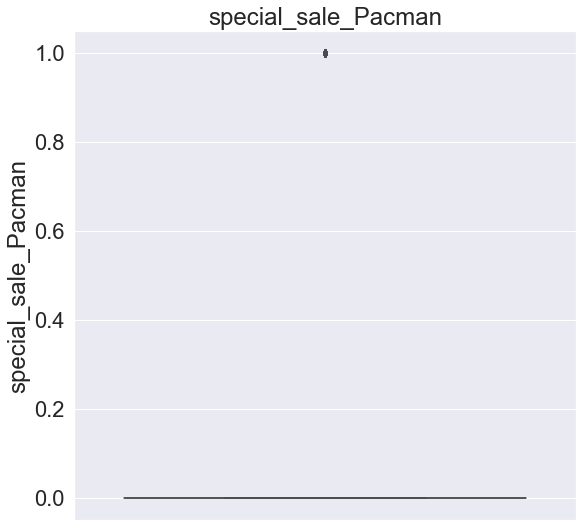

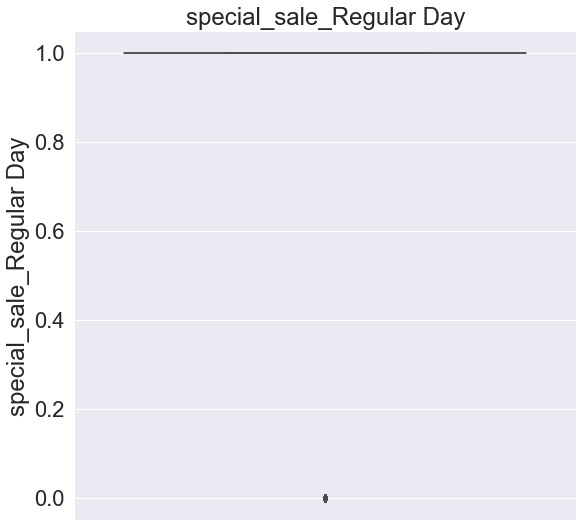

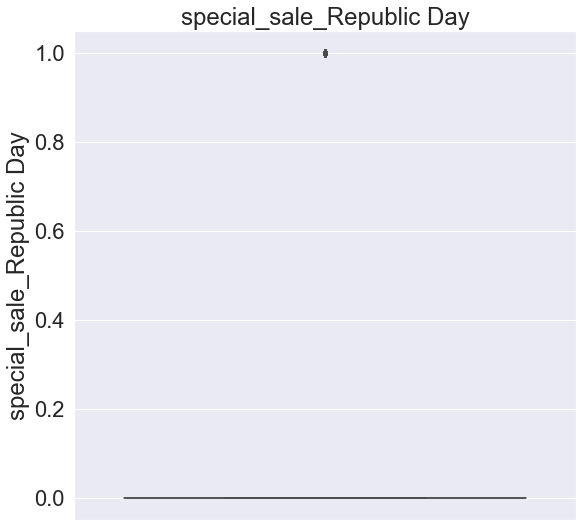

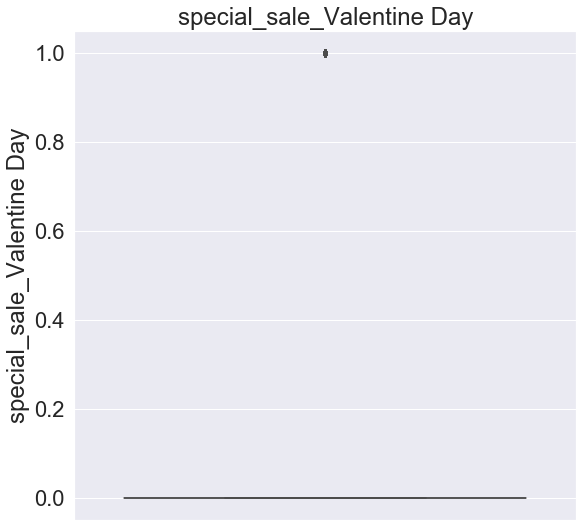

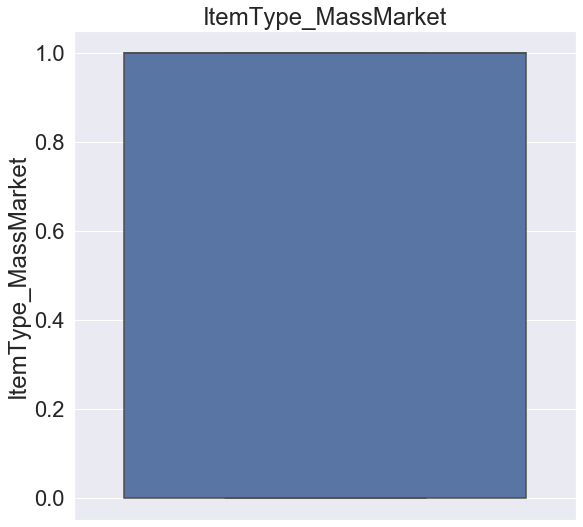

In [31]:
for col in list(ha.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=ha, y=col).set_title(col)

In [32]:
ha.shape

(62116, 50)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df_train, df_test = train_test_split(ha, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gmv                                         62116 non-null  float64
 1   units                                       62116 non-null  int64  
 2   deliverycdays                               62116 non-null  int64  
 3   sla                                         62116 non-null  int64  
 4   product_mrp                                 62116 non-null  float64
 5   product_procurement_sla                     62116 non-null  int64  
 6   wday                                        62116 non-null  int64  
 7   Pay_Day                                     62116 non-null  int64  
 8   is_holiday                                  62116 non-null  int64  
 9   Discount_Percentage                         62116 non-null  float64
 10  delivery_o

In [38]:
ha['gmv'].unique()

array([6255., 6850., 6700., ..., 4895., 4775., 9600.])

In [39]:
# Create a list of the variables that you need to scale
varlist1 = []
dum_cols = list(dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in ha.columns:
    if col not in dum_cols:
        varlist1.append(col)

In [40]:
# Scale these variables using 'fit_transform'
df_train[varlist1] = scaler.fit_transform(df_train[varlist1])

In [41]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
62022,0.00,0.00,0.00,0.23,0.01,0.29,1.00,0,0,0.42,...,0,0,0,0,0,0,1,0,0,1
61776,0.02,0.00,0.00,0.10,0.02,0.07,0.17,1,0,0.25,...,0,0,0,0,0,0,1,0,0,1
26367,0.03,0.00,0.00,0.13,0.03,0.36,0.17,1,0,0.22,...,0,0,0,0,0,0,1,0,0,1
41294,0.02,0.00,0.00,0.18,0.02,0.07,0.67,1,1,0.24,...,1,0,0,0,0,0,0,0,0,1
58467,0.01,0.00,0.00,0.20,0.01,0.21,0.00,0,0,0.22,...,0,0,0,0,0,0,1,0,0,1


In [42]:
# Split the train dataset into X and y
y_train = df_train.pop('gmv')
X_train = df_train

In [43]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.32265401e-01 -4.48997761e-02  1.10231787e-01  5.97882067e-01
 -3.69240604e-02  4.85621194e-05  3.13124198e-04 -4.13462950e-04
 -3.55252459e-02 -1.05009772e-01 -1.08623597e+02  5.40559692e+00
  8.45502754e+00  5.57234177e+01  1.73658282e+00  1.39013969e+01
  1.92726367e+01  1.72968874e+00  1.81586996e+01  7.03987783e+00
 -1.45717688e-10  3.10480808e-12 -1.02508875e-04 -1.45991541e-03
  2.53165854e-03  3.39620962e-02  3.88230317e-01  1.02257211e-03
  4.26662758e-02 -4.61208161e-03 -1.00183089e-02 -7.49385916e-03
  3.09411501e-03 -4.54170390e-03  4.14271290e-02 -1.27876958e-02
  3.34978444e-02  9.25072027e-04  3.14052235e-06  2.38087568e-04
  1.12765742e-03  6.83832707e-04  8.04834930e-04  1.36643698e-03
 -7.97683991e-04  1.19496643e-04  1.23881176e-03  4.04501328e-04
 -7.10944089e-03]
-0.6689074959052328


In [45]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True False False  True False False False False False False  True  True
  True  True  True  True  True  True  True  True False False False False
 False False  True False  True False False False False False  True False
 False False False False False False False False False False False False
 False]
[ 1  5  4  1  6 32 28 27  2  3  1  1  1  1  1  1  1  1  1  1 34 35 31 18
 15  8  1 19  1 14 11 12 16 13  1  9  7 20 33 29 23 25 24 21 17 30 22 26
 10]


In [46]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,product_mrp,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,GMV_lag_2_per,product_analytic_vertical_DJController,product_analytic_vertical_KaraokePlayer
62022,1.00,0.00,0.01,0.58,1.00,0.14,0.48,0.11,0.76,0.09,0.32,0.59,0.84,0.01,0,0
61776,1.00,0.00,0.02,0.58,1.00,0.14,0.48,0.11,0.76,0.09,0.32,0.59,0.84,0.01,0,0
26367,1.00,0.00,0.03,0.62,0.58,0.21,0.67,0.31,0.92,0.29,0.00,0.00,0.93,0.01,0,0
41294,1.00,0.00,0.02,0.42,0.47,0.00,0.04,0.26,0.94,0.06,1.00,1.00,1.00,0.01,0,0
58467,1.00,0.00,0.01,0.28,0.30,0.13,0.14,0.19,0.87,0.09,0.00,0.00,0.94,0.01,0,0


In [47]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     9686.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:57:09   Log-Likelihood:             1.2313e+05
No. Observations:               43481   AIC:                        -2.462e+05
Df Residuals:                   43465   BIC:                        -2.461e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [50]:
#Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
3,Total Investment,"1,089,584,201.60"
6,Sponsorship,"418,852,768.48"
9,SEM,"52,202,745.76"
11,Other,"44,219,829.99"
8,Online marketing,"15,465,792.94"
5,Digital,"10,029,746.00"
12,Affiliates,"3,829,444.77"
4,TV,"2,115,848.34"
0,const,"494,375.78"
7,Content Marketing,"413,375.38"


In [51]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                 1.032e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:58:32   Log-Likelihood:             1.2303e+05
No. Observations:               43481   AIC:                        -2.460e+05
Df Residuals:                   43466   BIC:                        -2.459e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0023      0.001     -2.005      0.045      -0.005   -5.11e-05
units                                       0.1238      0.005     27.500      0.000       0.115       0.133
product_mrp                                 0.6075      0.002    339.820      0.000       0.604       0.611
TV                                         -0.0129      0.005     -2.821      0.005      -0.022      -0.004
Digital                                     0.0195      0.007      2.982      0.003       0.007       0.032
Sponsorship                                 0.0164      0.003      4.855      0.000       0.010       0.023
Content Marketing                          -0.0176      0.006     -2.906      0.004      -0.030      -0.006
Online marketing                           -0.0371      0.011     -3.510      0.000      -0.058      -0.016
SEM                                        -0.0088      0.007     -1.231      0.218      -0.023       0.005
Radio                                       0.0103      0.007      1.582      0.114      -0.002       0.023
Other                                      -0.0023      0.007     -0.324      0.746      -0.016       0.012
Affiliates                                  0.0404      0.011      3.696      0.000       0.019       0.062
GMV_lag_2_per                               0.4813      0.007     70.461      0.000       0.468       0.495
product_analytic_vertical_DJController      0.0523      0.002     26.571      0.000       0.048       0.056
product_analytic_vertical_KaraokePlayer     0.0642      0.014      4.496      0.000       0.036       0.092
==============================================================================
Omnibus:                    23413.233   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35623868.008
Skew:                          -1.026   Prob(JB):                         0.00
Kurtosis:                     143.210   Cond. No.                         430.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
11,Affiliates,"1,903.20"
7,Online marketing,"1,831.19"
8,SEM,"1,488.04"
10,Other,"1,363.41"
4,Digital,"1,238.39"
6,Content Marketing,"1,020.69"
9,Radio,"1,018.57"
5,Sponsorship,317.30
3,TV,309.68
0,const,277.37


In [53]:
# X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                 1.111e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:00:03   Log-Likelihood:             1.2303e+05
No. Observations:               43481   AIC:                        -2.460e+05
Df Residuals:                   43467   BIC:                        -2.459e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0020      0.001     -1.813      0.070      -0.004       0.000
units                                       0.1238      0.005     27.490      0.000       0.115       0.133
product_mrp                                 0.6075      0.002    339.819      0.000       0.604       0.611
TV                                         -0.0159      0.004     -4.147      0.000      -0.023      -0.008
Digital                                     0.0138      0.005      3.013      0.003       0.005       0.023
Sponsorship                                 0.0164      0.003      4.850      0.000       0.010       0.023
Content Marketing                          -0.0199      0.006     -3.426      0.001      -0.031      -0.009
Online marketing                           -0.0373      0.011     -3.532      0.000      -0.058      -0.017
Radio                                       0.0029      0.003      1.161      0.246      -0.002       0.008
Other                                       0.0054      0.003      1.644      0.100      -0.001       0.012
Affiliates                                  0.0416      0.011      3.823      0.000       0.020       0.063
GMV_lag_2_per                               0.4815      0.007     70.492      0.000       0.468       0.495
product_analytic_vertical_DJController      0.0524      0.002     26.584      0.000       0.049       0.056
product_analytic_vertical_KaraokePlayer     0.0642      0.014      4.496      0.000       0.036       0.092
==============================================================================
Omnibus:                    23404.090   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35636494.123
Skew:                          -1.025   Prob(JB):                         0.00
Kurtosis:                     143.235   Cond. No.                         415.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
10,Affiliates,"1,887.56"
7,Online marketing,"1,830.60"
6,Content Marketing,930.48
4,Digital,601.69
5,Sponsorship,317.29
9,Other,295.30
0,const,268.43
3,TV,218.96
8,Radio,150.62
2,product_mrp,1.07


In [55]:
X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                 1.203e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:00:56   Log-Likelihood:             1.2303e+05
No. Observations:               43481   AIC:                        -2.460e+05
Df Residuals:                   43468   BIC:                        -2.459e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0006      0.001     -0.605      0.545      -0.003       0.001
units                                       0.1237      0.005     27.477      0.000       0.115       0.133
product_mrp                                 0.6076      0.002    339.877      0.000       0.604       0.611
TV                                         -0.0076      0.003     -2.511      0.012      -0.014      -0.002
Digital                                     0.0128      0.005      2.813      0.005       0.004       0.022
Sponsorship                                 0.0073      0.002      3.331      0.001       0.003       0.012
Content Marketing                          -0.0185      0.006     -3.198      0.001      -0.030      -0.007
Radio                                       0.0032      0.003      1.282      0.200      -0.002       0.008
Other                                       0.0023      0.003      0.715      0.474      -0.004       0.008
Affiliates                                  0.0040      0.002      1.787      0.074      -0.000       0.008
GMV_lag_2_per                               0.4820      0.007     70.581      0.000       0.469       0.495
product_analytic_vertical_DJController      0.0522      0.002     26.512      0.000       0.048       0.056
product_analytic_vertical_KaraokePlayer     0.0642      0.014      4.496      0.000       0.036       0.092
==============================================================================
Omnibus:                    23413.207   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35730072.401
Skew:                          -1.025   Prob(JB):                         0.00
Kurtosis:                     143.419   Cond. No.                         333.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
6,Content Marketing,926.35
4,Digital,599.69
8,Other,273.68
0,const,234.95
7,Radio,150.44
3,TV,137.19
5,Sponsorship,134.12
9,Affiliates,78.89
2,product_mrp,1.07
10,GMV_lag_2_per,1.06


In [57]:
# X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Content Marketing', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 1.312e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:02:08   Log-Likelihood:             1.2302e+05
No. Observations:               43481   AIC:                        -2.460e+05
Df Residuals:                   43469   BIC:                        -2.459e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0026      0.000     11.166      0.000       0.002       0.003
units                                       0.1237      0.005     27.475      0.000       0.115       0.133
product_mrp                                 0.6076      0.002    339.875      0.000       0.604       0.611
TV                                          0.0010      0.001      0.699      0.485      -0.002       0.004
Digital                                    -0.0017      0.000     -3.392      0.001      -0.003      -0.001
Sponsorship                                 0.0008      0.001      0.978      0.328      -0.001       0.002
Radio                                       0.0040      0.002      1.604      0.109      -0.001       0.009
Other                                      -0.0035      0.003     -1.353      0.176      -0.009       0.002
Affiliates                                 -0.0029      0.001     -4.798      0.000      -0.004      -0.002
GMV_lag_2_per                               0.4827      0.007     70.696      0.000       0.469       0.496
product_analytic_vertical_DJController      0.0523      0.002     26.542      0.000       0.048       0.056
product_analytic_vertical_KaraokePlayer     0.0643      0.014      4.496      0.000       0.036       0.092
==============================================================================
Omnibus:                    23361.099   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35810969.328
Skew:                          -1.018   Prob(JB):                         0.00
Kurtosis:                     143.578   Cond. No.                         323.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Other,184.47
6,Radio,148.99
3,TV,29.40
5,Sponsorship,18.88
0,const,11.88
4,Digital,6.98
8,Affiliates,5.73
2,product_mrp,1.07
9,GMV_lag_2_per,1.06
10,product_analytic_vertical_DJController,1.02


In [59]:
X_train_rfe1 = X_train_rfe1.drop('Other', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 1.443e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:03:18   Log-Likelihood:             1.2302e+05
No. Observations:               43481   AIC:                        -2.460e+05
Df Residuals:                   43470   BIC:                        -2.459e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0026      0.000     11.084      0.000       0.002       0.003
units                                       0.1237      0.005     27.474      0.000       0.115       0.133
product_mrp                                 0.6077      0.002    340.049      0.000       0.604       0.611
TV                                         -0.0008      0.000     -1.833      0.067      -0.002    5.72e-05
Digital                                    -0.0019      0.000     -3.953      0.000      -0.003      -0.001
Sponsorship                                 0.0016      0.001      2.573      0.010       0.000       0.003
Radio                                       0.0006      0.000      2.457      0.014       0.000       0.001
Affiliates                                 -0.0022      0.000     -6.907      0.000      -0.003      -0.002
GMV_lag_2_per                               0.4826      0.007     70.685      0.000       0.469       0.496
product_analytic_vertical_DJController      0.0523      0.002     26.540      0.000       0.048       0.056
product_analytic_vertical_KaraokePlayer     0.0643      0.014      4.496      0.000       0.036       0.092
==============================================================================
Omnibus:                    23378.885   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35800171.764
Skew:                          -1.020   Prob(JB):                         0.00
Kurtosis:                     143.557   Cond. No.                         320.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,11.74
5,Sponsorship,10.23
4,Digital,6.40
3,TV,2.98
6,Radio,1.65
7,Affiliates,1.60
2,product_mrp,1.07
8,GMV_lag_2_per,1.06
9,product_analytic_vertical_DJController,1.02
1,units,1.01


In [61]:
X_train_rfe1 = X_train_rfe1.drop('const', axis=1)
lm_9 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          2.857e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:04:00   Log-Likelihood:                      1.2296e+05
No. Observations:               43481   AIC:                                 -2.459e+05
Df Residuals:                   43471   BIC:                                 -2.458e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1236      0.005     27.407      0.000       0.115       0.132
product_mrp                                 0.6114      0.002    348.027      0.000       0.608       0.615
TV                                         -0.0002      0.000     -0.526      0.599      -0.001       0.001
Digital                                    -0.0012      0.000     -2.559      0.011      -0.002      -0.000
Sponsorship                                 0.0008      0.001      1.284      0.199      -0.000       0.002
Radio                                       0.0004      0.000      1.532      0.125      -0.000       0.001
Affiliates                                  0.0002      0.000      0.843      0.399      -0.000       0.001
GMV_lag_2_per                               0.4992      0.007     74.846      0.000       0.486       0.512
product_analytic_vertical_DJController      0.0519      0.002     26.325      0.000       0.048       0.056
product_analytic_vertical_KaraokePlayer     0.0637      0.014      4.453      0.000       0.036       0.092
==============================================================================
Omnibus:                    25009.233   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35328837.873
Skew:                          -1.232   Prob(JB):                         0.00
Kurtosis:                     142.622   Cond. No.                         250.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Sponsorship,23.94
2,TV,13.97
3,Digital,10.52
6,Affiliates,8.79
5,Radio,2.08
1,product_mrp,1.80
7,GMV_lag_2_per,1.76
8,product_analytic_vertical_DJController,1.03
0,units,1.02
9,product_analytic_vertical_KaraokePlayer,1.00


In [63]:
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          3.174e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:05:00   Log-Likelihood:                      1.2296e+05
No. Observations:               43481   AIC:                                 -2.459e+05
Df Residuals:                   43472   BIC:                                 -2.458e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1236      0.005     27.408      0.000       0.115       0.132
product_mrp                                 0.6114      0.002    348.027      0.000       0.608       0.615
TV                                          0.0002      0.000      0.456      0.648      -0.000       0.001
Digital                                    -0.0007      0.000     -3.050      0.002      -0.001      -0.000
Radio                                       0.0003      0.000      1.083      0.279      -0.000       0.001
Affiliates                                  0.0002      0.000      0.841      0.400      -0.000       0.001
GMV_lag_2_per                               0.4991      0.007     74.837      0.000       0.486       0.512
product_analytic_vertical_DJController      0.0519      0.002     26.331      0.000       0.048       0.056
product_analytic_vertical_KaraokePlayer     0.0637      0.014      4.452      0.000       0.036       0.092
==============================================================================
Omnibus:                    24979.002   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35357427.014
Skew:                          -1.228   Prob(JB):                         0.00
Kurtosis:                     142.678   Cond. No.                         229.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
5,Affiliates,8.79
2,TV,7.65
3,Digital,2.29
1,product_mrp,1.80
6,GMV_lag_2_per,1.76
4,Radio,1.69
7,product_analytic_vertical_DJController,1.03
0,units,1.02
8,product_analytic_vertical_KaraokePlayer,1.00


In [65]:
X_train_rfe1 = X_train_rfe1.drop('Affiliates', axis=1)
lm_9 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          3.571e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:06:22   Log-Likelihood:                      1.2296e+05
No. Observations:               43481   AIC:                                 -2.459e+05
Df Residuals:                   43473   BIC:                                 -2.458e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1236      0.005     27.415      0.000       0.115       0.132
product_mrp                                 0.6117      0.002    354.998      0.000       0.608       0.615
TV                                          0.0004      0.000      1.667      0.095   -6.33e-05       0.001
Digital                                    -0.0006      0.000     -2.948      0.003      -0.001      -0.000
Radio                                       0.0003      0.000      1.387      0.165      -0.000       0.001
GMV_lag_2_per                               0.5002      0.007     76.596      0.000       0.487       0.513
product_analytic_vertical_DJController      0.0519      0.002     26.318      0.000       0.048       0.056
product_analytic_vertical_KaraokePlayer     0.0637      0.014      4.450      0.000       0.036       0.092
==============================================================================
Omnibus:                    25121.554   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35380033.786
Skew:                          -1.246   Prob(JB):                         0.00
Kurtosis:                     142.722   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,TV,3.28
3,Digital,2.22
1,product_mrp,1.73
5,GMV_lag_2_per,1.69
4,Radio,1.55
0,units,1.02
6,product_analytic_vertical_DJController,1.02
7,product_analytic_vertical_KaraokePlayer,1.00


In [67]:
X_train_rfe1 = X_train_rfe1.drop('TV', axis=1)
lm_10 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          4.081e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:07:15   Log-Likelihood:                      1.2296e+05
No. Observations:               43481   AIC:                                 -2.459e+05
Df Residuals:                   43474   BIC:                                 -2.458e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1237      0.005     27.420      0.000       0.115       0.132
product_mrp                                 0.6123      0.002    363.906      0.000       0.609       0.616
Digital                                    -0.0004      0.000     -2.442      0.015      -0.001   -8.08e-05
Radio                                       0.0005      0.000      2.574      0.010       0.000       0.001
GMV_lag_2_per                               0.5030      0.006     79.591      0.000       0.491       0.515
product_analytic_vertical_DJController      0.0517      0.002     26.268      0.000       0.048       0.056
product_analytic_vertical_KaraokePlayer     0.0636      0.014      4.444      0.000       0.036       0.092
==============================================================================
Omnibus:                    25461.370   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35417460.472
Skew:                          -1.289   Prob(JB):                         0.00
Kurtosis:                     142.795   Cond. No.                         99.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
1,product_mrp,1.65
4,GMV_lag_2_per,1.58
2,Digital,1.36
3,Radio,1.16
0,units,1.02
5,product_analytic_vertical_DJController,1.02
6,product_analytic_vertical_KaraokePlayer,1.00


In [69]:
# Predicting using the 12th model
y_train_price = lm_10.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

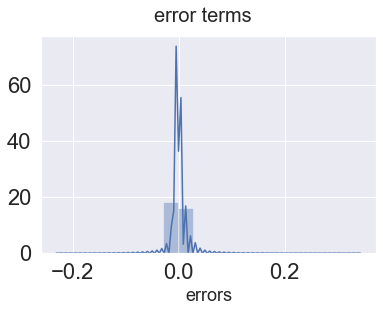

In [70]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)

In [71]:
df_test[varlist1] = scaler.transform(df_test[varlist1])

In [72]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [73]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [74]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Radio',
       'Other', 'Affiliates', 'GMV_lag_2_per',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_KaraokePlayer'],
      dtype='object')

In [75]:
X_train_rfe1.columns

Index(['units', 'product_mrp', 'Digital', 'Radio', 'GMV_lag_2_per',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_KaraokePlayer'],
      dtype='object')

In [76]:
# Let's now drop the variables we had manually eliminated as well
#X_test_rfe2 =X_test_rfe2[col]
#X_test = df_test
X_test_rfe2 = X_test_rfe2[X_train_rfe1.columns]

In [77]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Digital', 'Radio', 'GMV_lag_2_per',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_KaraokePlayer'],
      dtype='object')

In [78]:
# Add a constant to the test set created
#X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18635 entries, 44315 to 1387
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   units                                    18635 non-null  float64
 1   product_mrp                              18635 non-null  float64
 2   Digital                                  18635 non-null  float64
 3   Radio                                    18635 non-null  float64
 4   GMV_lag_2_per                            18635 non-null  float64
 5   product_analytic_vertical_DJController   18635 non-null  uint8  
 6   product_analytic_vertical_KaraokePlayer  18635 non-null  uint8  
dtypes: float64(5), uint8(2)
memory usage: 909.9 KB


In [79]:
# Making predictions
y_pred = lm_10.predict(X_test_rfe2)

In [80]:
print(X_test_rfe2.shape)
print(X_train_rfe1.shape)

(18635, 7)
(43481, 7)


Text(0, 0.5, 'y_pred')

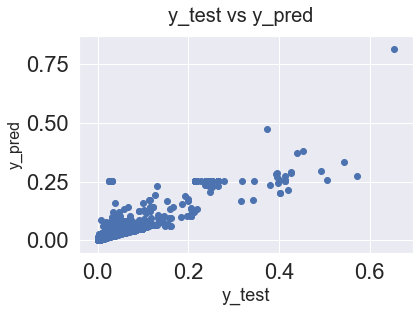

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7712633727709212

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [84]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.0135531897954403

In [85]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [86]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)